Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
**ACTIVITY NO.2** | **Training Linear Models**
**Name** | Villamor, Kurt Russel A
**Section** | CPE31S3
**Date Performed**: | September 5, 2024|
**Date Submitted**: | September 5, 2024|
**Instructor**: | Dr. Alonica Villanueva / Engr. Roman M. Richard
<hr>

In [175]:
import warnings

warnings.filterwarnings("ignore") # The Red warnings about Future deprecated will be gone

## 1. Objectives

This activity aims to:
* Perform regression analysis using linear regression and polynomial regression; and
* Solve classification problem using logistic regression.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Demonstrate how to use Python to predic outcome using linear and polynomial regression;
* Demonstrate how to use single and multiple features to predict the outcome using linear regression;
* Demonstrate how to train and predict classification model using logistic regression;
* Evaluate and visualize the performance of different regression models.

## 3. Procedures and Outputs

### 3.1 Setup

These are configurations for running on your local machine. No problem with running it on your colab. This project requires Python 3.7 or above:

In [176]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [177]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [178]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/training_linear_models` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [179]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 3.2 Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* or the *intercept term*.

#### 3.2.1 The Normal Equation

In [180]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

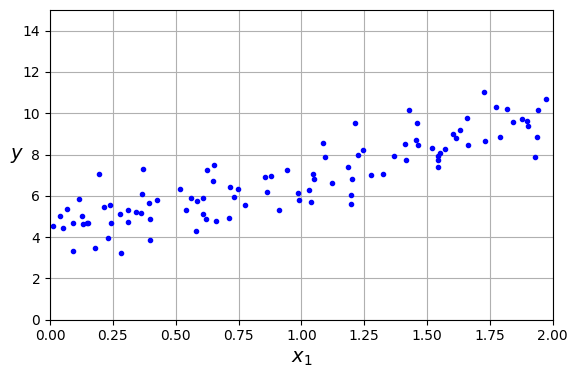

In [181]:
# extra code – generates and saves Figure 4–1

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

In [182]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [183]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [184]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

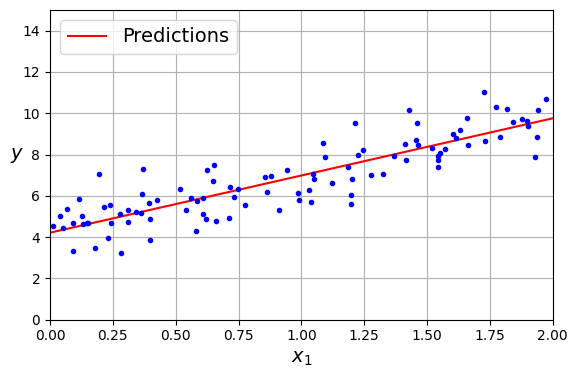

In [185]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

In [186]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [187]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [188]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

The pseudoinverse is computed using a standard matrix factorization technique called *Singular Value Decomposition*. What does SVD do? Quickly research and answer.
- SVD is a factorization of a matrix using rotation thas is followed by resclaing and another rotations. It generalizes the eigendecomposition of a square normal matrix with an orthonormal eigenbasis to any ⁠ m × n {\displaystyle m\times n}⁠ matrix. It is related to the polar decomposition.
- This also called DATA REDUCTION, used for solving Homogeneous Linear Equations, Digital Signal Processing, Image processing and curve fitting applications

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [189]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

You have multiple methods used to implement the for linear regression. Provide a comparison between the *Singular Value Decomposition* and the Normal Equation Computation. Which is more efficient?
- I guess for the efficiency,  i will stick to using the "Singular Value Method". When you are handling big data, its not optimal to invert matrixes of values by inverting the matrix just to find the answer that SVD can achieve also without exceeding more effort. Also in the note from John D. Cook, PhD that its better to solve Ax = B rather then multiply A^-1 (Inversing the matrix)
- John. (2024, May 20). Don’t invert that matrix. John D. Cook | Applied Mathematics Consulting. https://www.johndcook.com/blog/2010/01/19/dont-invert-that-matrix/

### 3.2 Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. Generally, the idea is to tweak parameters iteratively to minimize a cost funtion.

#### 3.2.1 Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost func tion with regards to each model parameter θj. In other words, you need to calculate
how much the cost function will change if you change θj
just a little bit. This is called a partial derivative. It is like asking “what is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions).

In [190]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

The trained model parameters:

In [191]:
theta

array([[4.21509616],
       [2.77011339]])

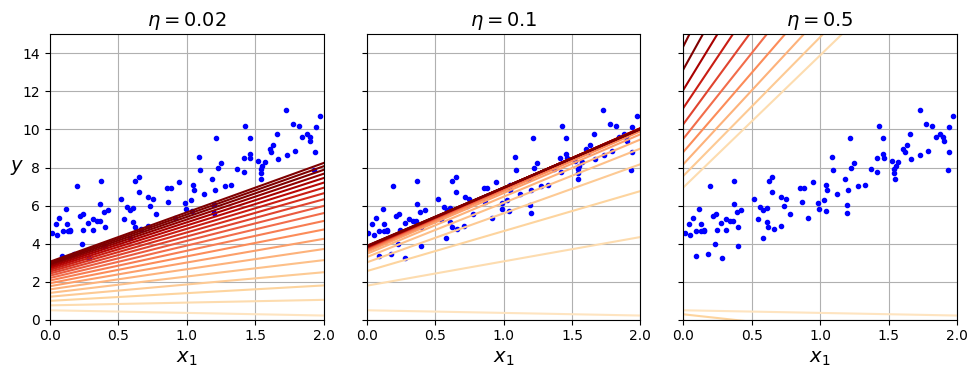

In [192]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()

Compare the learning rate provided and shown in the graph above. Provide a quick discussion on how learning rate affects model learning based on the given figure.
- The Learning rate will determine the steps of the gradient Decent. The goal is to make data points to fit in a line by stepping with the guide of learning rate. With that being said, the learning rate should not be not so big since it will result to a far lines and this also not be so near to 0 since that also result to a line that is not fit. This also tell us the Gradient Decent is sensitive to learning rate

#### 3.2.2 Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.)

In [193]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

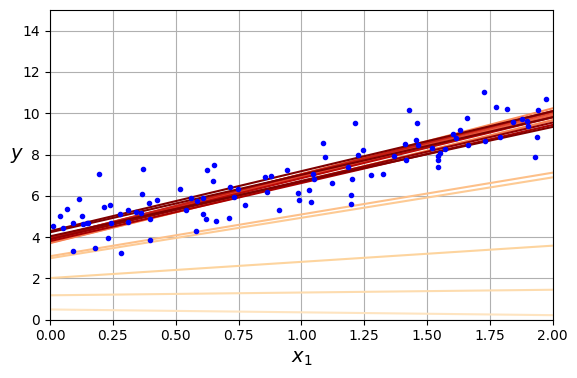

In [194]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

In [195]:
theta

array([[4.21076011],
       [2.74856079]])

In [196]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [197]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

Compare the Stochastic Gradient Descent used in this section to the gradient descent algorithm used previously. What are the benefits to using Stochastic Gradient Descent (SGD)? - Gradient Descent is so slow since it calculate the data points individualy that is slow and so much more slower in big data and Stochastic Gradient Decent only take sample in the given datas and that reduce the points to calculate the slope 

#### 3.2.3 Mini-batch gradient descent

The last Gradient Descent algorithm we will look at is called Mini-batch Gradient Descent. It is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called minibatches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

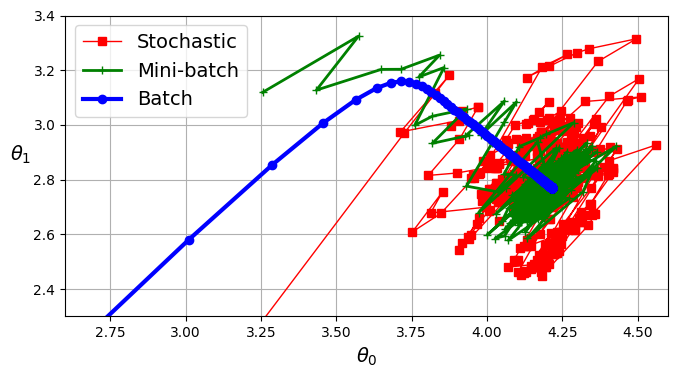

In [198]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
save_fig("gradient_descent_paths_plot")
plt.show()

Provide a comparison of the 3 gradient descent algorithms included in this section. The comparison must provide an analysis based on different factors such as execution time (among others).
- ### lets have this example in compare them...

In [199]:
# have have a sample dataset 
from sklearn import datasets, model_selection, preprocessing

# Sample dataset
X,y = datasets.make_regression(n_samples = 10000, n_features = 2, noise = 7, random_state = 16)

# Split of train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 3)

# lets just consider the testing since where testing the fitting performance
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)

- And now I will run it individually

In [200]:
# For the Gradient Descent
def GDfit(X, y, max_iter = 50):
        m, n = X.shape
        weights = np.random.rand(n)
        bias = np.random.rand(1)[0]
        costs = []
        
        for i in range(1, max_iter + 1):
            y_pred = np.dot(X, weights) + bias
            mse = (1 / m) * np.sum(np.square(y_pred - y))
            costs.append(mse)
            
            dw = (2 / m) * np.dot(X.T, y_pred - y)
            db = (2 / m) * np.sum(y_pred - y)
            
            temp = weights
            weights = weights - eta * dw
            bias = bias - 0.001 * db
            
            if i % 100 == 0:
                print(f"Epoch: {i}\tCost: {mse}")
                
            if all(abs(weights - temp) <= 1e-6):
                print(f"Stopped at iteration {i} !")
                break

In [201]:
%time
GDEpoch = GDfit(X_train, y_train)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 6.44 μs
Stopped at iteration 35 !


In [202]:
# For the Stochastic Gradient Decent
def learning_schedule(t):
        return 5 / (t + 500)
    
def SGDfit(X, y, max_iter=50):
        m, n = X.shape
        weights = np.random.rand(n)
        bias = np.random.rand(1)[0]
        losses, flag = [], False
        
        for epoch in range(1, max_iter + 1):
            perm_idx = np.random.permutation(m)
            X, y = X[perm_idx], y[perm_idx]
            
            if flag: break
                
            if epoch % 10 == 0:
                print(f"Epoch: {epoch}\tLoss: {losses[epoch - 1]}")
                
            for i in range(m):
                rand_idx = np.random.randint(m)
                X_i = X[rand_idx: rand_idx + 1]
                y_i = y[rand_idx: rand_idx + 1]
                
                y_pred = np.dot(X_i, weights) + bias
                loss = np.sum(np.square(y_pred - y_i))
                losses.append(loss)
                
                dw = np.dot(X_i.T, y_pred - y_i)
                db = np.sum(y_pred - y_i)
                
                temp = weights
                eta = learning_schedule(m * epoch + i)
                
                weights = weights - eta * dw
                bias = bias - 0.001 * db
                
                if all(abs(weights - temp) <= 1e-8):
                    print(f"Stopped at iteration {epoch} !")
                    flag = True

In [203]:
%%time
SDPEpoch = SGDfit(X_train,y_train)

Stopped at iteration 7 !
CPU times: user 850 ms, sys: 76.6 ms, total: 926 ms
Wall time: 927 ms


In [204]:
# for mini batch Gradient Decent

def MBGDfit(X, y, batch_size, max_iter = 10000):
        m, n = X.shape
        weights = np.random.rand(n)
        bias = np.random.rand(1)[0]
        costs, flag = [], False
        
        for epoch in range(1, max_iter + 1):
            perm_idx = np.random.permutation(m)
            X, y = X[perm_idx], y[perm_idx]
            
            if flag: break
                
            if epoch % 100 == 0:
                print(f"Epoch: {epoch}\tLoss: {costs[epoch - 1]}")
                
            for i in range(0, m, batch_size):
                X_mini = X[i: i + batch_size]
                y_mini = y[i: i + batch_size]
                
                y_pred = np.dot(X_mini, weights) + bias
                cost = 1 / batch_size * np.sum(np.square(y_pred - y_mini))
                costs.append(cost)
                
                dw = 2 / batch_size * np.dot(X_mini.T, y_pred - y_mini)
                db = 2 / batch_size * np.sum(y_pred - y_mini)
                
                temp = weights
                weights = weights - eta * dw
                bias = bias - 0.001 * db
                
                if all(abs(weights - temp) <= 1e-7):
                    print(f"Stopped at iteration {epoch} !")
                    flag = True
                    break
        return epoch
            

In [205]:
%time
MBGDfit(X_train, y_train,10000)

CPU times: user 4 μs, sys: 0 ns, total: 4 μs
Wall time: 7.15 μs
Stopped at iteration 51 !


52

- In this matter we clearly see that Gradient decent alon  e is slow for a big data. In this sample,
mini batch seems tio have higher epoch since we need to tweak the batch size value. Stocasthic in the other hand got low epoch.

### 3.3 Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

In [206]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

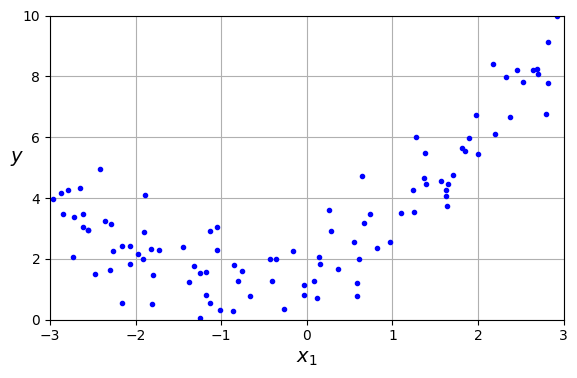

In [207]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

In [208]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [209]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [210]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

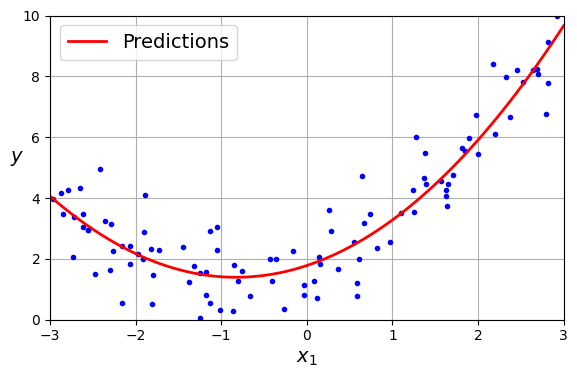

In [211]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

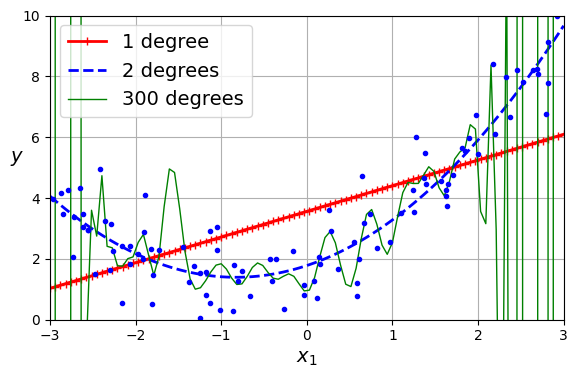

In [212]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

Based on this example, how is Polynomial Regression able to find relationships between features? Is this something simple Linear Regression is unable to do?

What do we achieve in the figure above? Explain the result of the comparison.
- Not all data present has a linear relationship. There are times we are dealing in data that is nonlinear. With that said, straight line can't fit the data properly and accurately, thus we use Polynomial regression.
- Well this figure above tell us the comparison of our result when we use linear model and polynomial model (or quadratic).
- to be clear the 300 degree line tries to get all the data points thus making it overfitting and linear model making it underfitting making the quadraatic model a best fit

### 3.4 Learning Curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression.

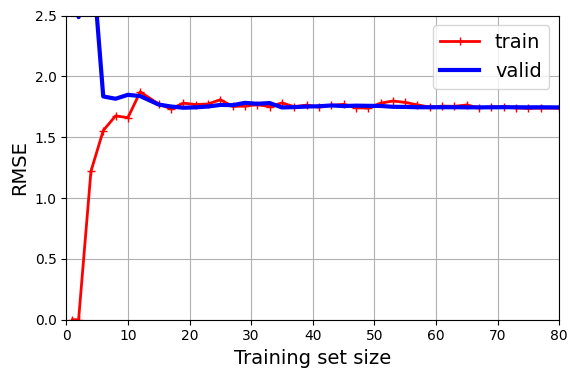

In [213]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
save_fig("underfitting_learning_curves_plot")

plt.show()

This deserves a bit of explanation. First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit
them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.


Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

What are these learning curves indicating? Is the model overfitting or underfitting? Explain why.
- It indicates that the model is trying its best to fit in. Based to this the plot I guess it is a best fit since is almost hit all of the valid values.

In [214]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

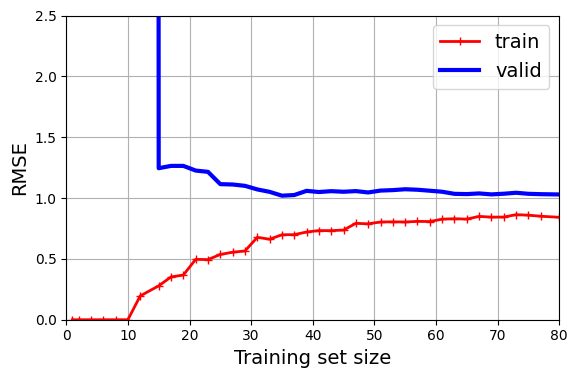

In [215]:
# extra code – generates and saves Figure 4–16

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

Compare this learning curve with the one previously shown above. The major differences you must explain here are as follows:

* The learning rate - The rate of error is much lower than the other one
* The gap between the curves arew slowly coming to each other as the training value moves

### 3.5 Regularized Linear Models

a good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

#### 3.5.1 Ridge Regression

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

Let's generate a very small and noisy linear dataset:

In [216]:
# extra code – we've done this type of generation several times before
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

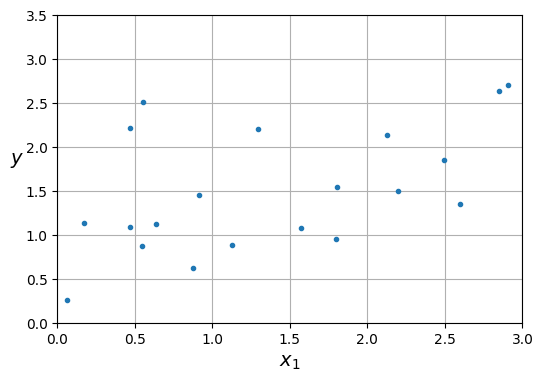

In [217]:
# extra code – a quick peek at the dataset we just generated
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [218]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the same.

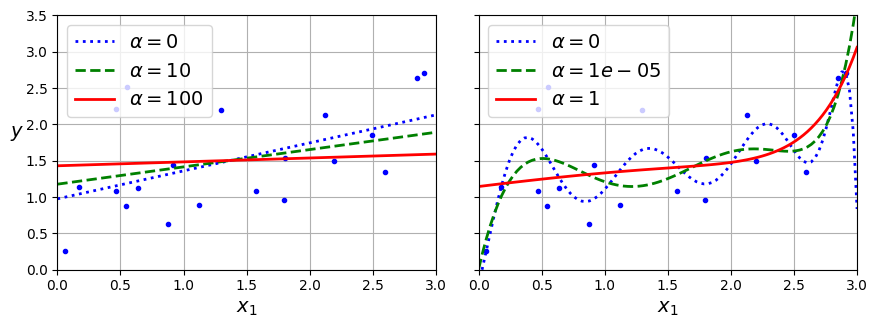

In [219]:
# extra code – this cell generates and saves Figure 4–17

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression_plot")
plt.show()

In [220]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([1.55302613])

In [221]:
# extra code – show that we get roughly the same solution as earlier when
#              we use Stochastic Average GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

In [222]:
# extra code – shows the closed form solution of Ridge regression,
#              compare with the next Ridge model's learned parameters below
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [223]:
ridge_reg.intercept_, ridge_reg.coef_  # extra code

(array([0.97896386]), array([[0.38286422]]))

Discuss the following:
* What is the purpose of the hyperparameter alpha as seen in the figures above?
  - it is used to control the regulaztion of your model. it also Identify the integrity of the ridge Regression, alpha=0 means your just done a linear regression.
* Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it? i guess its suffers on high bias. 

#### 3.5.2 Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.

In [224]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero).

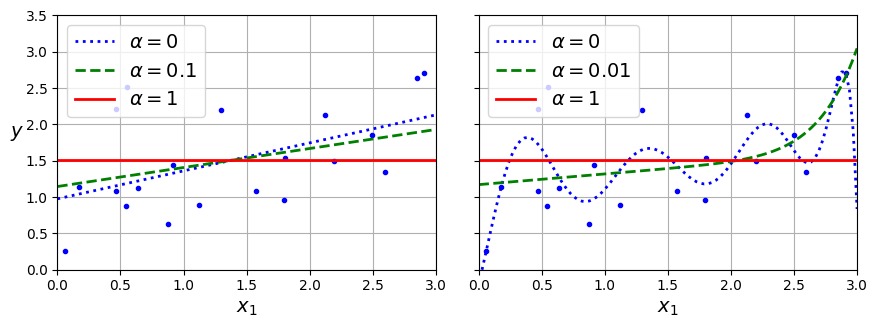

In [225]:
# extra code – this cell generates and saves Figure 4–18
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("lasso_regression_plot")
plt.show()

For example, the dashed line in the right plot on Figure 4-18 (with α = 10-7) looks quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero. In other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

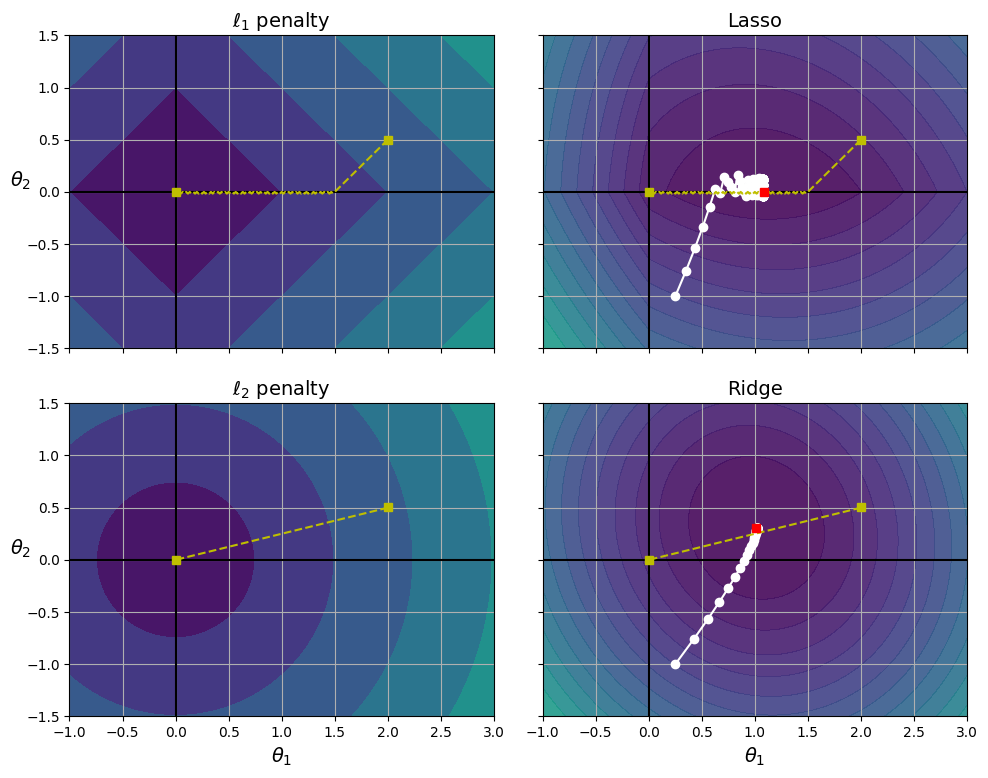

In [226]:
# extra code – this BIG cell generates and saves Figure 4–19

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

save_fig("lasso_vs_ridge_plot")
plt.show()

Using the figure above, compare the Lasso Regression and the Ridge Regression. What kind of performance is observable from the graph?
- the lasso gives a lot of converges (the bouncing around of the data points) and also make the parameter optimal

### 3.6 Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping.

Let's go back to the quadratic dataset we used earlier:

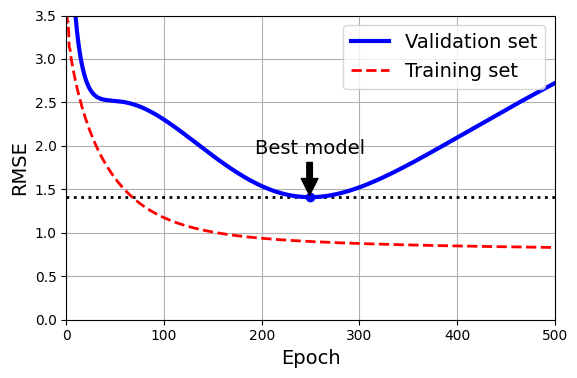

In [227]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
save_fig("early_stopping_plot")
plt.show()

Do you foresee any useful benefits of implementing early stopping?
- Clearly yes, This avoids the model to undergo overfitting.

### 3.7 Logistic Regression

Logistic Regression (also called Logit Regression) is com‐
monly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

#### 3.7.1 Estimating Probabilities

So how does it work? Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

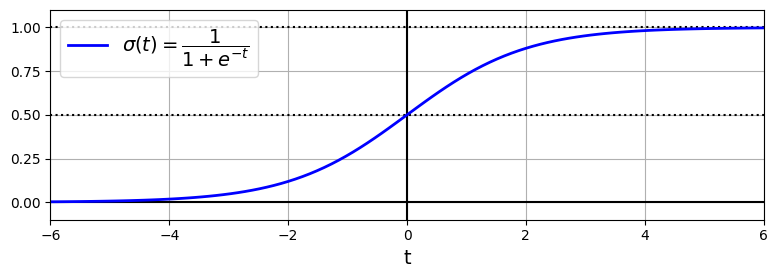

In [228]:
# extra code – generates and saves Figure 4–21

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
save_fig("logistic_function_plot")
plt.show()

Given the figure above, explain how the equation might be interpreted as the figure and how this provides a logistic regression prediction?
- It the equation estimated the value that wheer  data point(x) belongs to, it can make a prediction to value of data point (y) 

#### 3.7.2 Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

In [229]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [230]:
print(iris.DESCR)  # extra code – it's a bit too long

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [231]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [232]:
iris.target.head(3)  # note that the instances are not shuffled

0    0
1    0
2    0
Name: target, dtype: int64

In [233]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

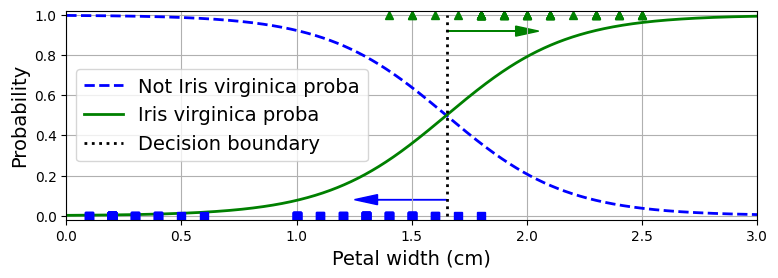

In [235]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

In [236]:
decision_boundary

np.float64(1.6516516516516517)

In [237]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

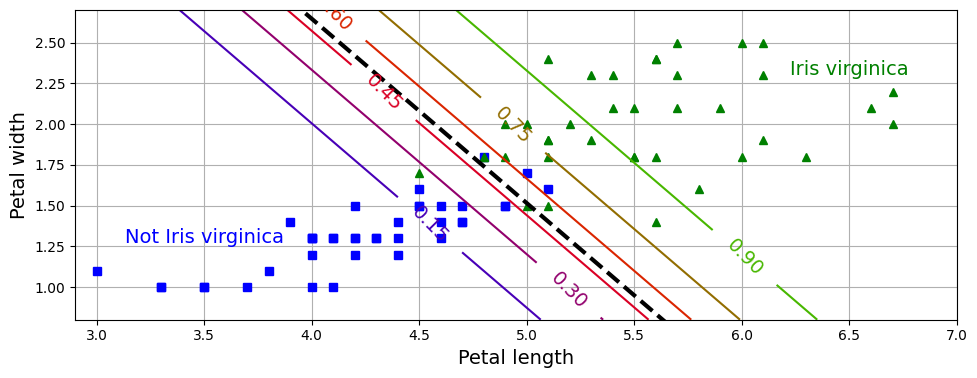

In [238]:
# extra code – this cell generates and saves Figure 4–24

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")
plt.show()

Given the above code and the figure provided, how do l1 and l2 penalties apply to the Logistic regression model?
- L2 penalty function uses the sum of the squares of the parameters and Ridge Regression encourages this sum to be small. L1 penalty function uses the sum of the absolute values of the parameters and Lasso encourages this sum to be small.

#### 3.7.3 Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

The idea is quite simple: when given an instance x, the Softmax Regression model first computes a score sk(x) for each class k, then estimates the probability of each
class by applying the somax function (also called the normalized exponential) to the scores. The equation to compute sk(x) should look familiar, as it is just like the equation for Linear Regression prediction

In [239]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [240]:
softmax_reg.predict([[5, 2]])

array([2])

In [241]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

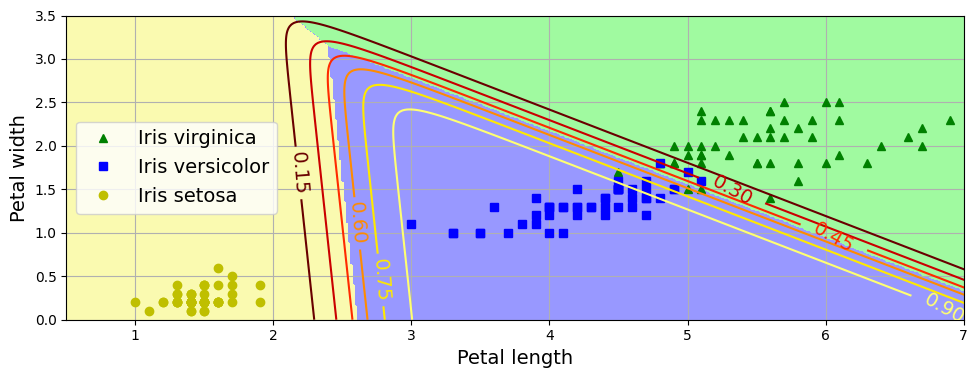

In [242]:
# extra code – this cell generates and saves Figure 4–25

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
save_fig("softmax_regression_contour_plot")
plt.show()

Given the code above as an example, how many classes can the Softmax Regression predict? Can it be used to on non-mutually exclusive classes (such as to recognize different faces in a picture)?
- the code gives us that Softmax Regression product can predict more than 2 classes (for this exmplae it has 3). I think its a no since Software Regression is designed to use in mutually inclusive classes and using something to a varaiables where its not designed to begin with can cause problems.

## 4. Supplementary Activity

#### 4.1 Linear Regression

* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values.
* Perform descriptive statistics such as mean, median and mode
* Compute the correlation
* Use One-hot encoding in categorical features
* Apply feature scaling
* Perform linear regression using one independent variable only using numpy
* Perform linear regression using multiple independent variable using statsmodel
* Perform linear regression using sklearn

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [244]:
# Import the dataset
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [245]:
df.info() # Determine the number of datapoints, columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [246]:
# Remove unneccesary columns
df.drop(['No','X1 transaction date', 'X2 house age'], axis=1, inplace=True)

In [247]:
# Do data cleaning such as removing empty values. - since there is no null values, I will proceed to the next
df.isnull().sum()

X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [248]:
# Perform descriptive statistics such as mean, median and mode
desc = df.describe()
desc.loc['range'] = desc.loc['max'] - desc.loc['min']
desc.rename(index={'50%':'median'},inplace=True)
desc.drop(['max','min'],inplace=True)
desc[1:]

,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
mean,1083.885689,4.094203,24.969030,121.533361,37.980193
std,1262.109595,2.945562,0.012410,0.015347,13.606488
25%,289.324800,1.000000,24.963000,121.528085,27.700000
median,492.231300,4.000000,24.971100,121.538630,38.450000
75%,1454.279000,6.000000,24.977455,121.543305,46.600000
range,6464.638160,10.000000,0.082520,0.092740,109.900000


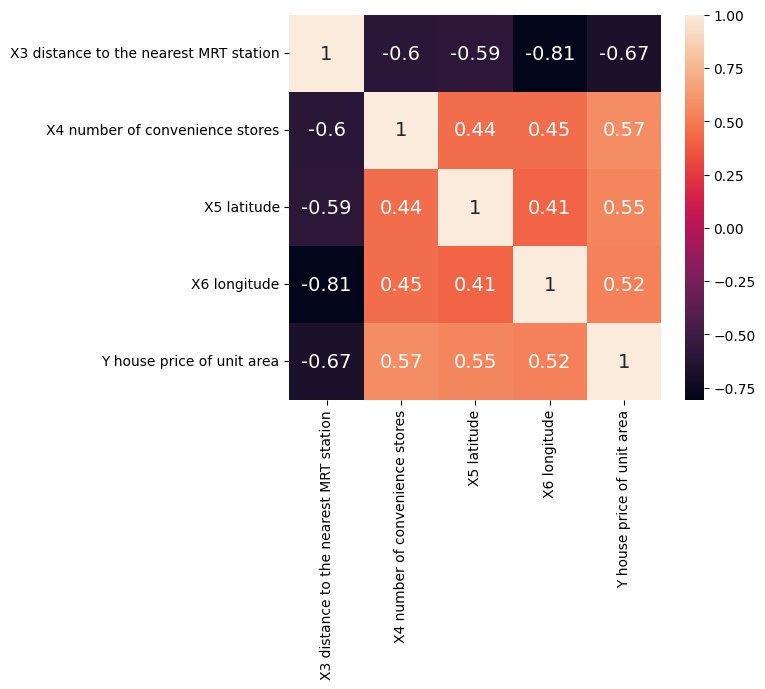

In [249]:
# Compute the correlation
plt.figure(figsize=(6,5))
ax = sns.heatmap(df.corr(),annot=True)

In [250]:
# Apply feature scaling

x = df.loc[:, 'X3 distance to the nearest MRT station':'X6 longitude']
df.loc[:, 'X3 distance to the nearest MRT station':'X6 longitude'] = (x - x.min()) / (x.max() - x.min()) # Min max normalization
df.loc[:, 'X3 distance to the nearest MRT station':'X6 longitude']

,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.009513,1.0,0.616941,0.719323
1,0.043809,0.9,0.584949,0.711451
2,0.083315,0.5,0.671231,0.758896
3,0.083315,0.5,0.671231,0.758896
4,0.056799,0.5,0.573194,0.743153
...,...,...,...,...
409,0.627820,0.0,0.114881,0.326504
410,0.010375,0.9,0.512118,0.750162
411,0.056861,0.7,0.571498,0.715225
412,0.012596,0.5,0.420141,0.723959


### Perform linear regression using one independent variable only using numpy

### Perform linear regression using multiple independent variable using statsmodel

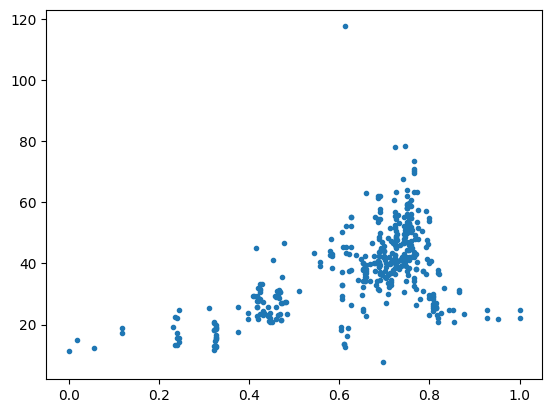

In [329]:
import statsmodels.api as sm # using the Statsmodel
# Another Different fEATURE TO USE
X = df.loc[:,'X6 longitude':'X6 longitude']
y = df['Y house price of unit area']

plt.plot(X,y,'.')

In [330]:
# Splicing the data to parts, 60% training, 40% in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [341]:
# adding constant 1.0
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [332]:
X_train

,const,X6 longitude
70,1.0,0.750162
38,1.0,0.794587
150,1.0,0.745741
224,1.0,0.735066
163,1.0,0.723959
...,...,...
255,1.0,0.119150
72,1.0,0.707354
396,1.0,0.831356
235,1.0,0.748760


In [342]:
# statmodel Linear Regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary(alpha = 0.05))

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.251
Model:                                    OLS   Adj. R-squared:                  0.248
Method:                         Least Squares   F-statistic:                     82.34
Date:                        Fri, 06 Sep 2024   Prob (F-statistic):           3.79e-17
Time:                                19:54:14   Log-Likelihood:                -942.22
No. Observations:                         248   AIC:                             1888.
Df Residuals:                             246   BIC:                             1895.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [334]:
y_pred = model.predict(X_test) # Running predictions
rmse = mean_squared_error(y_test, y_pred,squared = False) # Computing RMSE

print(f'\nRoot Mean Squared Error for Baseline Model: {rmse:.2f}')


Root Mean Squared Error for Baseline Model: 12.79


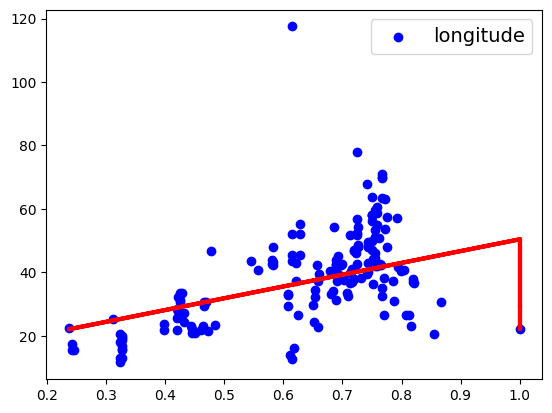

In [343]:
# Plot
plt.scatter(X_test.loc[:,'X6 longitude'], y_test, color='blue')
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.legend(['longitude'])

### Perform linear regression using sklearn

Text(0.5, 0, 'Distance to the nearest MRT station')

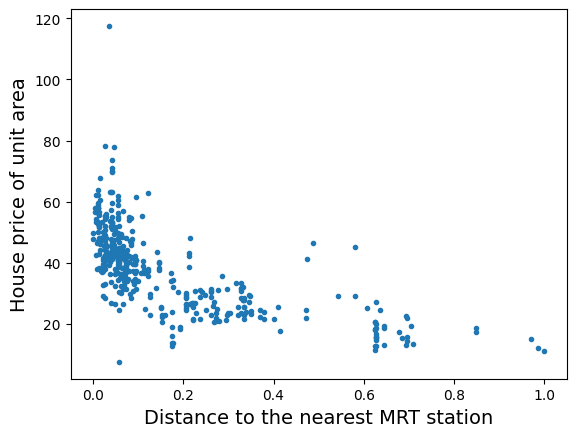

In [361]:
# Let's Try Different Features
X = df.loc[:,"X3 distance to the nearest MRT station":"X3 distance to the nearest MRT station"]
y = df['Y house price of unit area']

plt.plot(X,y,'.')
plt.ylabel("House price of unit area")
plt.xlabel("Distance to the nearest MRT station")

In [363]:
# Splicing the data to parts, 60% training, 40% in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [364]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression() # Our Created Model

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [365]:
#predictions
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

# The mean squared error (MSE)
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))

# R-Squared
print("R-Squared: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-43.27940176]
MSE: 129.99
R-Squared: 0.43


Text(0.5, 0, 'Distance to the nearest MRT station')

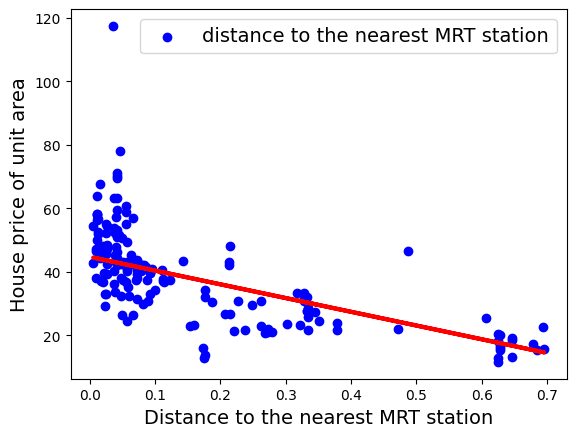

In [366]:
# Plotting
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.legend(['distance to the nearest MRT station'])
plt.ylabel("House price of unit area")
plt.xlabel("Distance to the nearest MRT station")

#### 4.2 Polynomial Regression

* Choose your own dataset
* Import the dataset
* Perform polynomial regression using sklearn and polyfit
* Measure the performance for each polynomial degree.
* Plot the performance of the model for each polynomial degree.

In [367]:
# Import the dataset
poldf = pd.read_csv("manufacturing.csv")
poldf

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


In [368]:
poldf.isnull().sum() # Seems that this dataset doesn't have any null values

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [369]:
poldf.info() # we are dealing with floats this time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [379]:
poldf.describe()[1:]

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [383]:
x = poldf.loc[:, 'Temperature (°C)':'Material Transformation Metric']
poldf.loc[:, 'Temperature (°C)':'Material Transformation Metric'] = (x - x.min()) / (x.max() - x.min()) # Min max normalization
poldf

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,0.548801,0.152422,0.171509,0.367153,0.316550,99.999971
1,0.715194,0.540558,0.485925,0.564789,0.513712,99.985703
2,0.602756,0.142034,0.177501,0.416339,0.374201,99.999758
3,0.544870,0.939336,0.650537,0.501841,0.312555,99.999975
4,0.423628,0.539845,0.350975,0.298199,0.204011,100.000000
...,...,...,...,...,...,...
3952,0.284016,0.839727,0.423844,0.264799,0.109838,100.000000
3953,0.489233,0.164467,0.164466,0.315792,0.259436,99.999997
3954,0.706790,0.569555,0.502473,0.560910,0.502334,99.989318
3955,0.545188,0.940529,0.651485,0.502558,0.312875,99.999975


<Axes: >

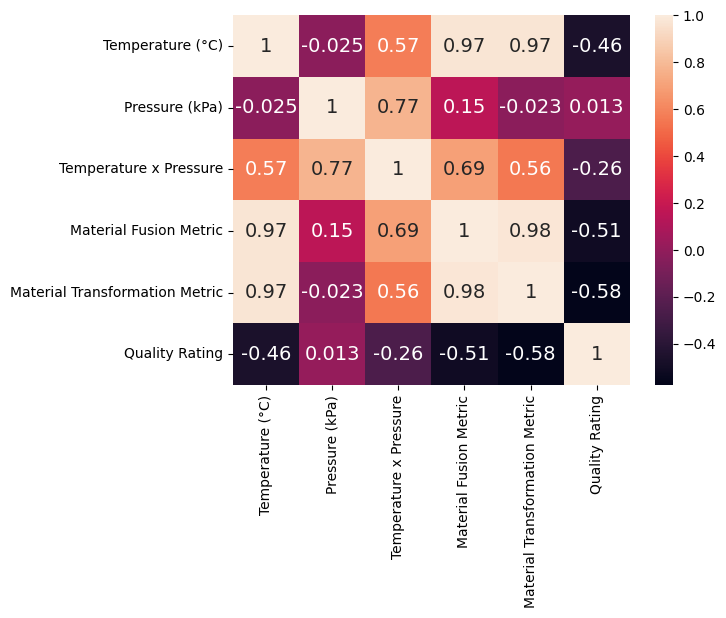

In [396]:
sns.heatmap(poldf.corr(), annot=True) # I always check the correlations to guide me where to start

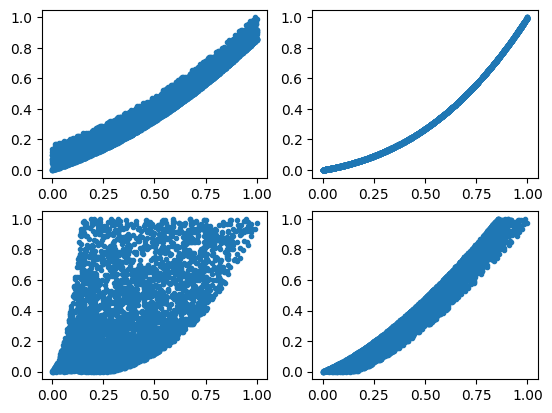

<Figure size 5000x3000 with 0 Axes>

In [447]:
# Lets pick an example combinations of data
fig, axs = plt.subplots(2, 2)
fig = plt.figure(figsize=(50,30))

# I gues i can pick any combination of these but i thik 0,1 is too perfect so lets select 0,0 to explore
axs[0,0].plot(poldf["Temperature (°C)"], poldf["Material Fusion Metric"],'.')
axs[0,1].plot(poldf["Temperature (°C)"], poldf["Material Transformation Metric"],'.')
axs[1,0].plot(poldf["Temperature x Pressure"], poldf["Material Transformation Metric"],'.')
axs[1,1].plot(poldf["Material Fusion Metric"], poldf["Material Transformation Metric"],'.')

In [508]:
# Let's Proceed to Perform polynomial regression using sklearn and polyfit
# lets First do it using polyfit
e = np.polyfit(poldf["Temperature (°C)"], poldf["Material Fusion Metric"], 2)
p = np.poly1d(e) # This is the trend line 

print(p) # this gives us the slope of the polynomial regression

        2
0.4258 x + 0.4242 x + 0.05102


In [509]:
poldf["Temperature (°C)"].shape

(3957,)

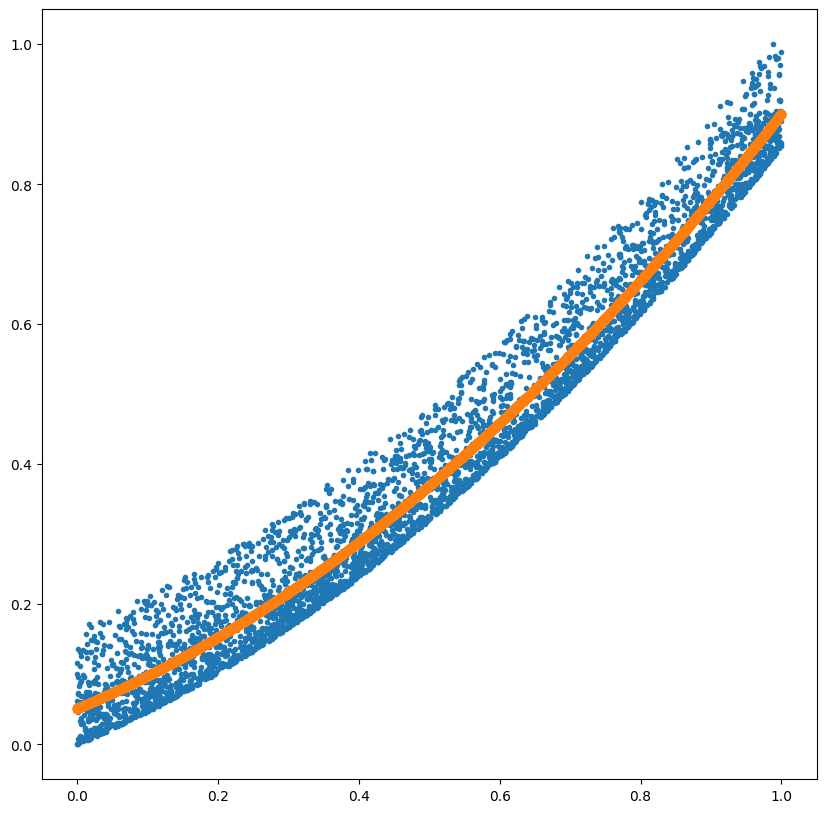

In [511]:
plt.figure(figsize=(10,10))
plt.plot(poldf["Temperature (°C)"], poldf["Material Fusion Metric"], '.')
plt.plot(poldf["Temperature (°C)"], p(poldf["Temperature (°C)"]),'o')
# Using Polyfit, we got the polynomial regression

In [565]:
# now using Sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model

X = poldf.loc[:,"Temperature (°C)":"Temperature (°C)"]
y = poldf["Material Fusion Metric"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [566]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

ValueError: X has 2 features, but PolynomialFeatures is expecting 1 features as input.

<Figure size 600x400 with 0 Axes>

#### 4.3 Logistic Regression

* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Solve classification problem using Logistic Regression
* Evaluate the model using classification report, accuracy and confusion matrix

In [645]:
# Import the dataset
hdf = pd.read_csv("hr.csv")
hdf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [646]:
# Determine the number of datapoints, columns and data types
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [647]:
hdf.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [648]:
hdf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [661]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

subdf = hdf[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [662]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary",dtype=int)
hdf_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
hdf_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [666]:
hdf_with_dummies.drop('salary',axis='columns',inplace=True)
hdf_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


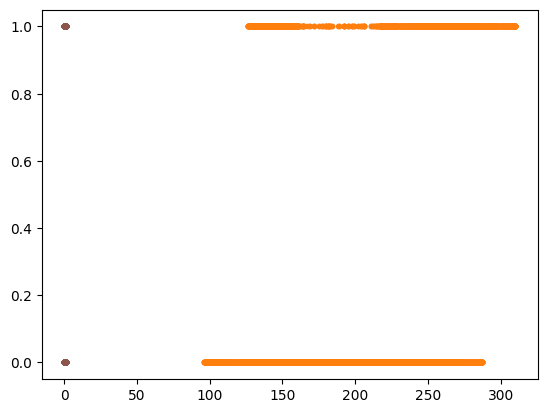

In [674]:
X = hdf_with_dummies
X.head()
y = hdf.left
plt.plot(X,y,'.')

In [675]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [676]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 1, 0])

In [677]:
model.score(X_test,y_test)

0.7788571428571428

## 5. Summary, Conclusions and Lessons Learned

- For now, I can't Absorbed this activities fully. Maybe i need to apply this more or practice more but for now this is some points that I've learned. (1) Gradient Descent goes throught all of the datapoints before adjusting the weight, Stochastic Gradient Decent in the other hand take a simgle sample then adjusts the weight then theres the mini batch gradient decent that gets a sample batch and adjust the weight. Polynomial Regression are used in the nonlinear relationship if data. while Logarithmic regression can be used in identifying the categorical data. Can be identying an identity that can be answered by yes or no (Binary) or Mulitiple factors.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*

***Disclaimer***

*Contents of this Notebook are based on Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow 3rd Edition by Aurelien Geron.*
*A copy of the complete text can be obtained here: https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/*